# Read and concatenate Chicago Crime Data


In [1]:
import pandas as pd
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticks
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [2]:
# find all csv file under Data/Chicago folder
path = 'Data/Chicago'
csv_files = glob.glob(path + "/*.csv")
csv_files.sort()
print(csv_files)

['Data/Chicago\\Chicago-Crime_2001.csv', 'Data/Chicago\\Chicago-Crime_2002.csv', 'Data/Chicago\\Chicago-Crime_2003.csv', 'Data/Chicago\\Chicago-Crime_2004.csv', 'Data/Chicago\\Chicago-Crime_2005.csv', 'Data/Chicago\\Chicago-Crime_2006.csv', 'Data/Chicago\\Chicago-Crime_2007.csv', 'Data/Chicago\\Chicago-Crime_2008.csv', 'Data/Chicago\\Chicago-Crime_2009.csv', 'Data/Chicago\\Chicago-Crime_2010.csv', 'Data/Chicago\\Chicago-Crime_2011.csv', 'Data/Chicago\\Chicago-Crime_2012.csv', 'Data/Chicago\\Chicago-Crime_2013.csv', 'Data/Chicago\\Chicago-Crime_2014.csv', 'Data/Chicago\\Chicago-Crime_2015.csv', 'Data/Chicago\\Chicago-Crime_2016.csv', 'Data/Chicago\\Chicago-Crime_2017.csv', 'Data/Chicago\\Chicago-Crime_2018.csv', 'Data/Chicago\\Chicago-Crime_2019.csv', 'Data/Chicago\\Chicago-Crime_2020.csv', 'Data/Chicago\\Chicago-Crime_2021.csv', 'Data/Chicago\\Chicago-Crime_2022.csv', 'Data/Chicago\\Chicago-Crime_2023.csv']


In [3]:
# read and merge all csv_files
df = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)
display(df.head(),df.tail())

C:\Users\Heng-Tser Tsai\AppData\Local\Temp\ipykernel_18876\4248295058.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3723059,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,732.00,7.00,6.00,41.77,-87.64
1,1322043,01/01/2001 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825.00,8.00,NaN,41.78,-87.68
2,1968773,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,"2,022.00",20.00,NaN,41.99,-87.66
3,5952122,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,"1,431.00",14.00,1.00,41.92,-87.70
4,1312179,01/01/2001 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,"1,533.00",15.00,NaN,41.87,-87.75


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
7029995,13120947,06/26/2023 11:42:00 PM,THEFT,$500 AND UNDER,APARTMENT,False,False,321.00,3.00,20.00,41.77,-87.61
7029996,13120829,06/26/2023 11:43:00 PM,THEFT,RETAIL THEFT,GAS STATION,False,False,923.00,9.00,14.00,41.79,-87.69
7029997,13120830,06/26/2023 11:46:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,932.00,9.00,16.00,41.80,-87.68
7029998,13120820,06/26/2023 11:50:00 PM,PUBLIC PEACE VIOLATION,OTHER VIOLATION,CTA PLATFORM,False,False,123.00,1.00,34.00,41.88,-87.63
7029999,13120824,06/26/2023 11:59:00 PM,ROBBERY,ARMED - HANDGUN,RESTAURANT,False,False,"2,423.00",24.00,49.00,42.01,-87.67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030000 entries, 0 to 7029999
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                object 
 6   Domestic              object 
 7   Beat                  float64
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: float64(5), int64(1), object(6)
memory usage: 643.6+ MB


# Create two forms of data


In [5]:
# Original format: convert Date to datetime dtype
df['Date'] = pd.to_datetime(df['Date'],
                           format = '%m/%d/%Y %I:%M:%S %p')

# set the datetime column as the index
df = df.set_index('Date')
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,3723059,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,732.00,7.00,6.00,41.77,-87.64
2001-01-01,1322043,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825.00,8.00,NaN,41.78,-87.68
2001-01-01,1968773,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,"2,022.00",20.00,NaN,41.99,-87.66
2001-01-01,5952122,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,"1,431.00",14.00,1.00,41.92,-87.70
2001-01-01,1312179,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,"1,533.00",15.00,NaN,41.87,-87.75


In [7]:
# A resampled/converted crime counts version 
# alternate code:
resampled_df = df.copy()
# add 'Count' column with 1 for each row
resampled_df['Count'] = 1
# resample and count with .sum()
resampled_df = resampled_df.resample('D').sum(numeric_only = True)

# check
resampled_df.head()

,ID,Beat,District,Ward,Latitude,Longitude,Count
Date,,,,,,,
2001-01-01,4011740634,"2,267,987.00","21,147.00","8,194.00","72,641.08","-152,199.72",1825
2001-01-02,1545846568,"1,404,493.00","12,797.00",147.00,"47,664.67","-99,856.85",1143
2001-01-03,1542074517,"1,462,886.00","13,359.00",132.00,"48,045.81","-100,651.35",1151
2001-01-04,1555657957,"1,397,040.00","12,994.00",0.00,"48,785.52","-102,222.92",1166
2001-01-05,1701884634,"1,530,155.00","14,044.00",156.00,"52,769.46","-110,554.59",1267


# Which district has the most crimes? Which has the least?

In [8]:
# create a barplot function
def plot_bar(df, y_column, pale, yticks, ylab):
  fig, axes = plt.subplots(nrows=1, figsize=(15,5), sharex=True)
  g = sns.countplot(data=df, y=y_column, 
              palette=pale, order = df[y_column].value_counts().index)
  g.set(yticklabels=yticks);
  g.set_xlabel('Counts');
  g.set_ylabel(ylab);
  g.set_title(f'Count of Each {ylab}', fontsize=14, weight = 'bold');

  total = float(len(df))
  for p in g.patches:
      count = round(p.get_width())
      y = p.get_y() + p.get_height()-0.3
      x = p.get_width()
      g.annotate(count, (x, y),ha='left')
        
  FOLDER = "PNG/"
  isExist = os.path.exists(FOLDER)
    
  if isExist == False:  
      os.makedirs(FOLDER, exist_ok=True)
        
  plt.savefig(f'{FOLDER}/{y_column}_barplot.png',bbox_inches='tight')

  return fig,g

In [9]:
# number of crimes per district
count_by_dis = df['District'].value_counts().rename_axis('District').to_frame('Count')
count_by_dis = count_by_dis.reset_index()
display(count_by_dis.head(1),count_by_dis.tail(1))

,District,Count
0,8.00,473042


,District,Count
23,21.00,4


In [10]:
# create a barplot for district column
yticks = count_by_dis['District']
pale = sns.color_palette("flare", count_by_dis.shape[0])
pale

[(0.92609759, 0.65099658, 0.48060392),
 (0.92237978, 0.61322733, 0.45740444),
 (0.91825103, 0.57516584, 0.43441436),
 (0.91366559, 0.53666778, 0.41177769),
 (0.90732341, 0.4939774, 0.38990532),
 (0.89995995, 0.45494253, 0.37420106),
 (0.89050882, 0.41601371, 0.36362102),
 (0.87806542, 0.37800172, 0.35942941),
 (0.85952586, 0.33905327, 0.36301129),
 (0.83765537, 0.30784814, 0.3723105),
 (0.81085964, 0.28202508, 0.38509649),
 (0.77932717, 0.26252522, 0.39889102),
 (0.74061927, 0.24733457, 0.41248516),
 (0.70342811, 0.2370976, 0.42226844),
 (0.66635279, 0.22717328, 0.43008427),
 (0.62963102, 0.2171635, 0.43606881),
 (0.58951566, 0.20622027, 0.44045213),
 (0.55314129, 0.19655316, 0.44225723),
 (0.51648277, 0.18774266, 0.44139128),
 (0.47936222, 0.18006056, 0.43733022),
 (0.43840678, 0.17219041, 0.42946642),
 (0.401357, 0.16501079, 0.41963528),
 (0.36470944, 0.15730861, 0.40792149),
 (0.32897621, 0.14807831, 0.39598285)]

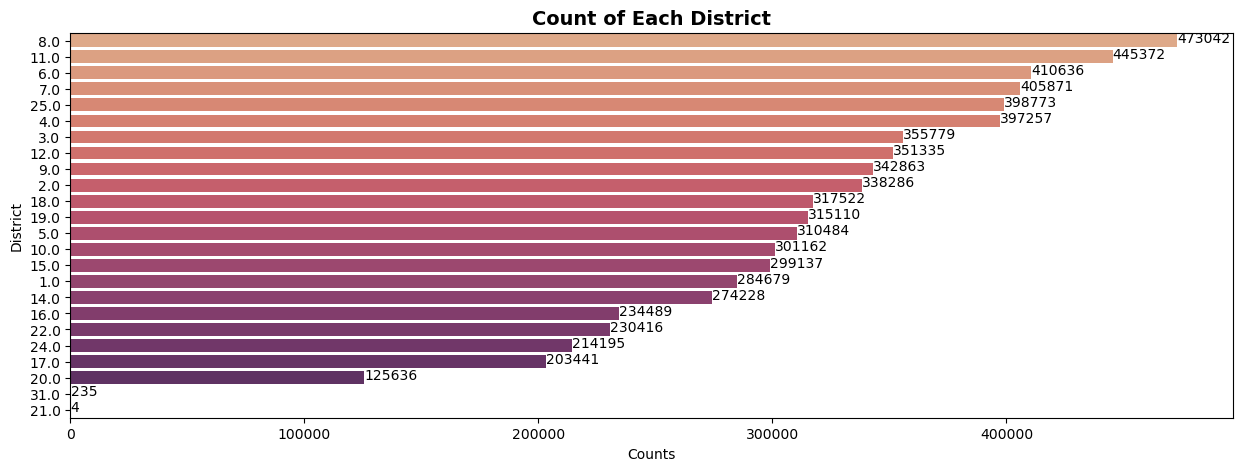

In [11]:
# plot crime counts by district
plot_bar(df_byday,
         y_column='District',
         pale=pale, yticks = yticks, ylab = 'District');

# Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

# What months have the most crime? What months have the least?